In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set path ke dataset
data_dir = pathlib.Path("/content/drive/MyDrive/Uang Baru")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images found: {image_count}")

# Load dataset (otomatis split train/validation)
batch_size = 32
img_height = 320
img_width = 320
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Mendapatkan nama kelas
class_names = train_ds.class_names
print("Class names:", class_names)

# Prefetch untuk performa lebih baik
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Normalisasi: dari [0,255] ke [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# CNN Model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Kompilasi model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

# Training model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

# Evaluasi model
loss, acc = model.evaluate(val_ds)
print(f"\nValidation accuracy: {acc:.2f}")


Mounted at /content/drive
Total images found: 2104
Found 3525 files belonging to 7 classes.
Using 2820 files for training.
Found 3525 files belonging to 7 classes.
Using 705 files for validation.
Class names: ['10 k', '100 RB', '1k', '20 K', '2k', '50 K', '5k']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 855s 6s/step - accuracy: 0.2999 - loss: 2.7392 - val_accuracy: 0.6752 - val_loss: 0.7955
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 438s 5s/step - accuracy: 0.7421 - loss: 0.7706 - val_accuracy: 0.8723 - val_loss: 0.3918
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 423s 5s/step - accuracy: 0.9293 - loss: 0.2400 - val_accuracy: 0.9191 - val_loss: 0.2325
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 462s 5s/step - accuracy: 0.9595 - loss: 0.1433 - val_accuracy: 0.9489 - val_loss: 0.1911
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.9756 - loss: 0.0866 - val_accuracy: 0.7716 - val_loss: 0.8204
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.9472 - loss: 0.1798 - val_accuracy: 0.9674 - val_loss: 0.1385
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 465s 5s/step - accuracy: 0.9875 - loss: 0.0385 - val_accuracy: 0.9872 - val_loss: 0.0658
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - accuracy: 0.9942 - loss: 0.0238 - val_accuracy: 0.9830 - v

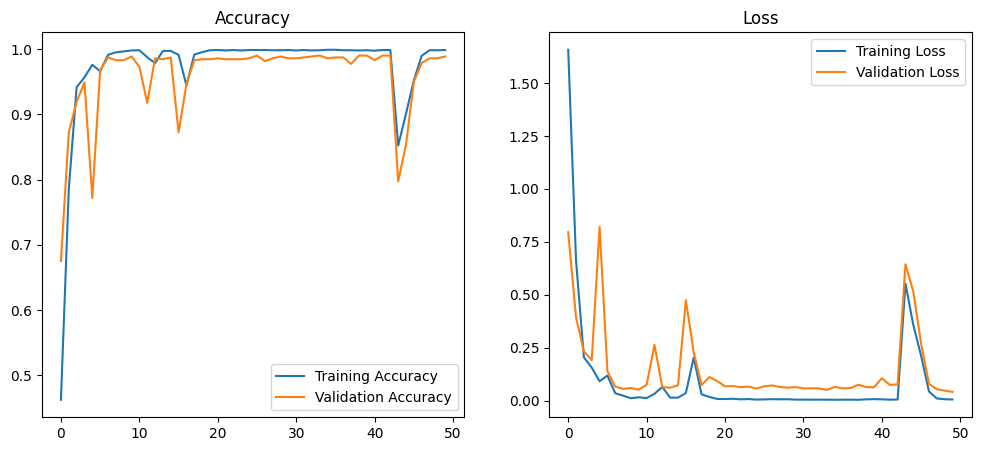

In [3]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [4]:
# Ekspor model ke format SavedModel
model.export('/content/drive/MyDrive/uang_model_saved')


Saved artifact at '/content/drive/MyDrive/uang_model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132228538244496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538248144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538245264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538248336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538249680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538250640: TensorSpec(shape=(), dtype=tf.resource, name

In [5]:
# Konversi ke TFLite dari SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/uang_model_saved')
tflite_model = converter.convert()

# Simpan ke file .tflite
with open('/content/drive/MyDrive/uang_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [7]:
tf.saved_model.save(model, '/content/drive/MyDrive/uang_model_saved')


In [9]:
# Konversi langsung dari objek model (DIREKOMENDASIKAN)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/drive/MyDrive/uang_model_320.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpbxwv5a5w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132228538244496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538248144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538245264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538248336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538247760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538249680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132228538250640: TensorSpec(shape=(), dtype=tf.resource, name=None)
